In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage.color import rgb2gray

In [ ]:
images = [cv2.imread(file) for file in glob.glob("/content/drive/My Drive/Colab-Notebooks/Semester 3/CV/Asgt 1/Images/*.*")]

## Question 2.1

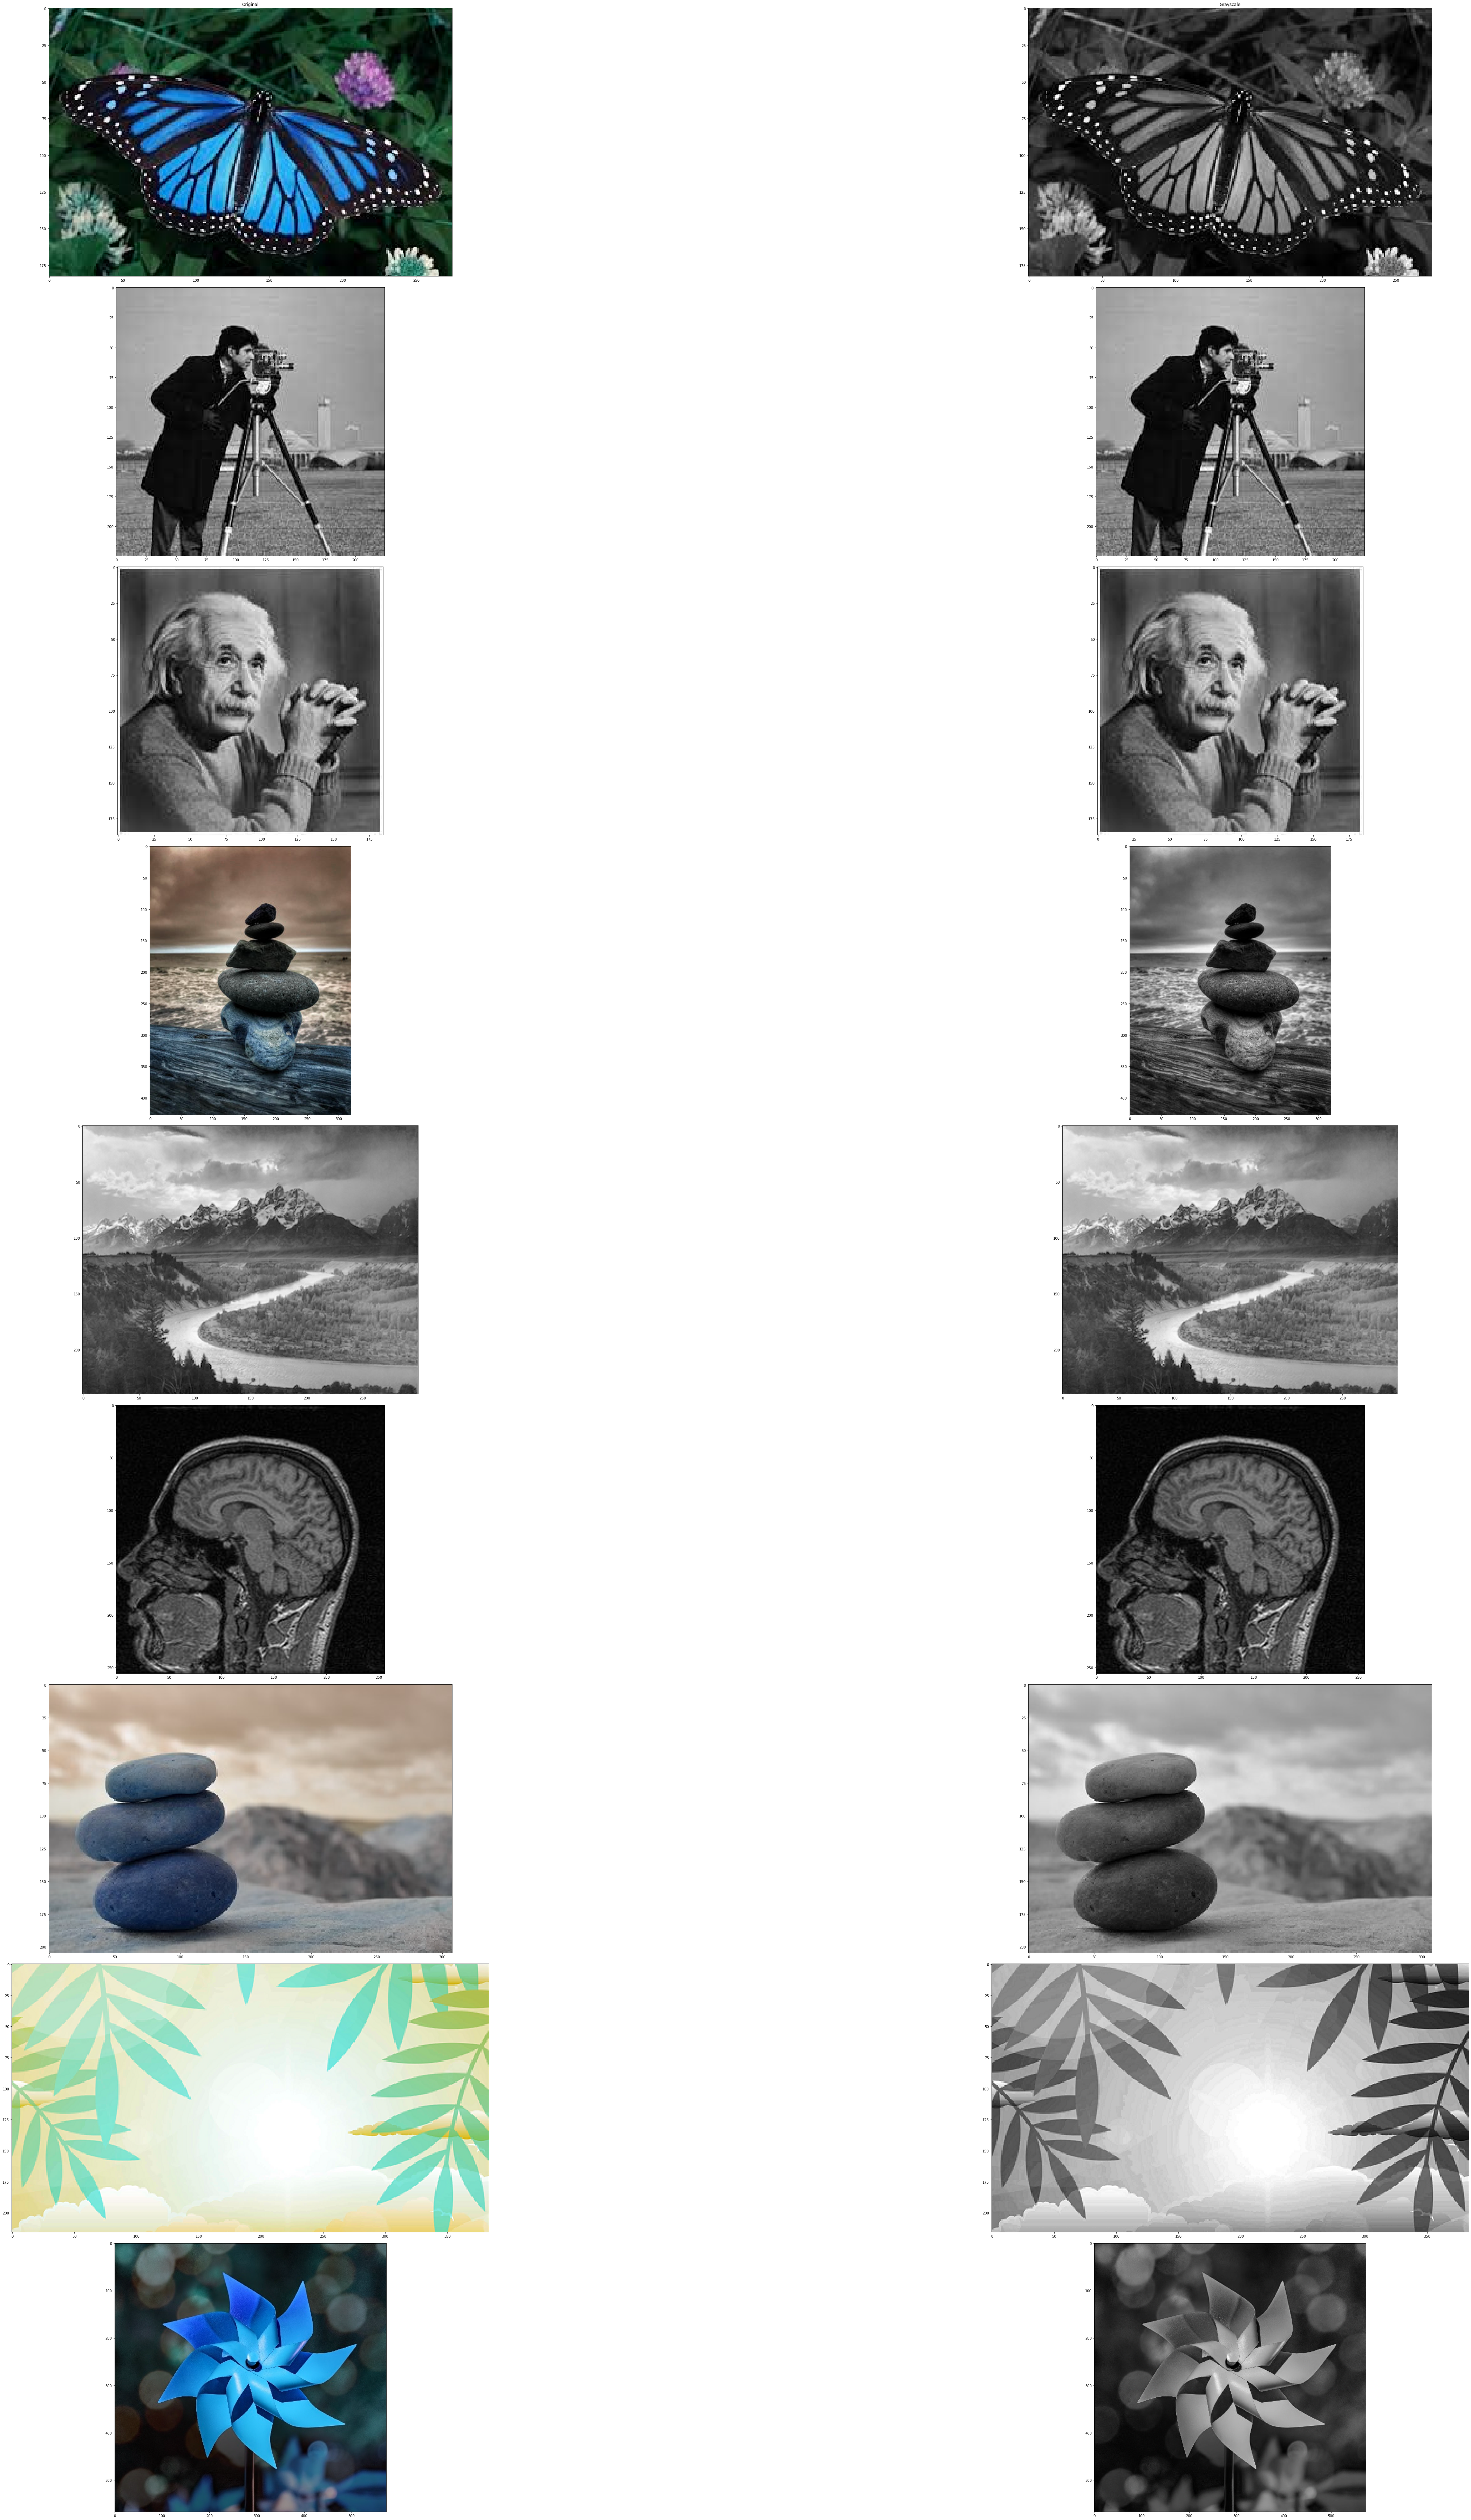

In [ ]:
from skimage import data
from skimage.color import rgb2gray

fig, axes = plt.subplots(9, 2, figsize=(100, 100))
ax = axes.ravel()

original = images[0]
grayscale = rgb2gray(original)
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

original = images[1]
grayscale = rgb2gray(original)
ax[2].imshow(original)
ax[3].imshow(grayscale, cmap=plt.cm.gray)

original = images[2]
grayscale = rgb2gray(original)
ax[4].imshow(original)
ax[5].imshow(grayscale, cmap=plt.cm.gray)

original = images[3]
grayscale = rgb2gray(original)
ax[6].imshow(original)
ax[7].imshow(grayscale, cmap=plt.cm.gray)

original = images[4]
grayscale = rgb2gray(original)
ax[8].imshow(original)
ax[9].imshow(grayscale, cmap=plt.cm.gray)

original = images[5]
grayscale = rgb2gray(original)
ax[10].imshow(original)
ax[11].imshow(grayscale, cmap=plt.cm.gray)

original = images[6]
grayscale = rgb2gray(original)
ax[12].imshow(original)
ax[13].imshow(grayscale, cmap=plt.cm.gray)

original = images[7]
grayscale = rgb2gray(original)
ax[14].imshow(original)
ax[15].imshow(grayscale, cmap=plt.cm.gray)

original = images[8]
grayscale = rgb2gray(original)
ax[16].imshow(original)
ax[17].imshow(grayscale, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

# Question 2.2

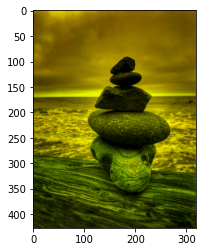

In [ ]:
def remove_channel (i,c):
  if c==0:
    # set red to 0
    i[:, :, 0] = 0

  if c==1:
    # set green to 0
    i[:, :, 1] = 0

  if c==2:
    # set blue to 0
    i[:, :, 2] = 0
  plt.imshow(i)


imagefunc = images[3]
copy = imagefunc.copy()
remove_channel(copy,2)


# Question 2.3


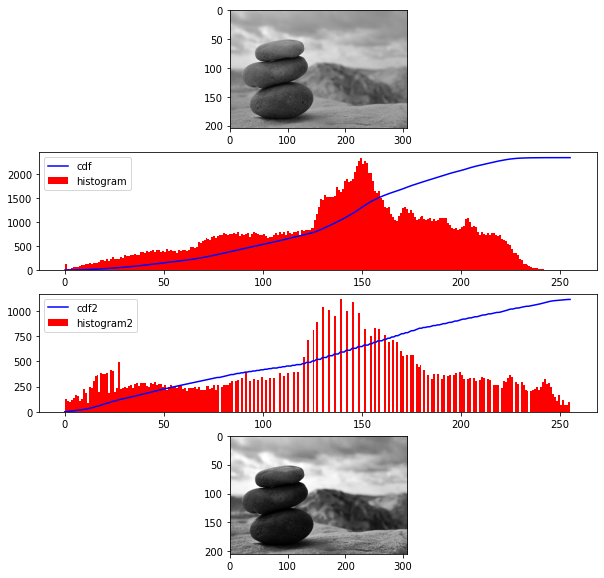

In [ ]:

figg, axh = plt.subplots(4, 1, figsize=(10, 10))
axhh = axh.ravel()
h = images[6]
gsh = cv2.cvtColor(h, cv2.COLOR_BGR2GRAY)
axhh[0].imshow(gsh, cmap=plt.cm.gray)
hist,bins = np.histogram(h.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

axhh[1].plot(cdf_normalized, color = 'b')
axhh[1].hist(h.flatten(),256,[0,256], color = 'r')
axhh[1].legend(('cdf','histogram'), loc = 'upper left')

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

h2 = cdf[gsh]

hist2,bins2 = np.histogram(h2.flatten(),256,[0,256])

cdf2 = hist2.cumsum()
cdf2_normalized = cdf2 * hist2.max()/ cdf2.max()

axhh[2].plot(cdf2_normalized, color = 'b')
axhh[2].hist(h2.flatten(),256,[0,256], color = 'r')
axhh[2].legend(('cdf2','histogram2'), loc = 'upper left')

axhh[3].imshow(h2, cmap=plt.cm.gray)

# Question 2.4

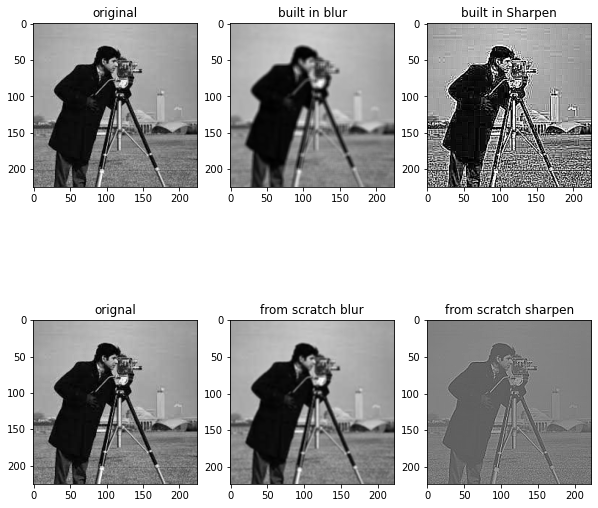

In [ ]:
figblur, axblur = plt.subplots(2, 3, figsize=(10, 10))
axblurr = axblur.ravel()

# Loading the image
blur = images[1]
blurgsh = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# cv2_imshow(blurgsh)
axblurr[0].title.set_text('original')
axblurr[0].imshow(blurgsh, cmap=plt.cm.gray)

# Performing averaging blurring on our images[0]
# Filters - left (5,5)
blurred_1 = cv2.blur(blurgsh,(5,5))
# cv2_imshow(blurred_1)
axblurr[1].title.set_text('built in blur')
axblurr[1].imshow(blurred_1, cmap=plt.cm.gray)

# Creating our sharpening filter
filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
# Applying cv2.filter2D function on our images[0]
sharpen_img_1=cv2.filter2D(blurgsh,-1,filter)
# cv2_imshow(sharpen_img_1)
axblurr[2].title.set_text('built in Sharpen')
axblurr[2].imshow(sharpen_img_1, cmap=plt.cm.gray)


# fs, fsax = plt.subplots(1, 3, figsize=(10, 10))
# fsaxx = fsax.ravel()

img_num = 1
o = cv2.cvtColor(images[img_num], cv2.COLOR_BGR2GRAY)
axblurr[3].title.set_text('orignal')
axblurr[3].imshow(o, cmap=plt.cm.gray)

img_mat = convert_image_matrix(img_num)
identity_kernel = (1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
a = original_VS_convoluted(img_num,'box_blur', transform_mat)
axblurr[4].title.set_text('from scratch blur')
axblurr[4].imshow(a, cmap=plt.cm.gray)

img_mat = convert_image_matrix(img_num)
identity_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
# identity_kernel = np.array([[-1,-1,-1],[-1,-9,-1],[-1,-1,-1]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
a = original_VS_convoluted(img_num,'sharpen', transform_mat)
axblurr[5].title.set_text('from scratch sharpen')
axblurr[5].imshow(a, cmap=plt.cm.gray)

In [ ]:
def convert_image_matrix(img_num):
    src = images[img_num]
    img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    gray_img = img
    gimg_shape = gray_img.shape
    gimg_mat = []
    for i in range(0, gimg_shape[0]):
        row = []
        for j in range(0, gimg_shape[1]):
            pixel = gray_img.item(i, j)
            row.append(pixel)
        gimg_mat.append(row)
    gimg_mat = np.array(gimg_mat)
    return gimg_mat

In [ ]:
def get_sub_matrices(orig_matrix, kernel_size):
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    if kernel_size[0] == kernel_size[1]:
        if kernel_size[0] > 2:
            orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
        else: pass
    else: pass
    
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    img_sampling = np.array(giant_matrix)
    return img_sampling

In [ ]:
def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    return transform_mat

In [ ]:
def original_VS_convoluted(img_num, kernel_name, convoluted_matrix):
    src = images[img_num]
    orig = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    conv = convoluted_matrix
    return conv

# Question 2.5.2

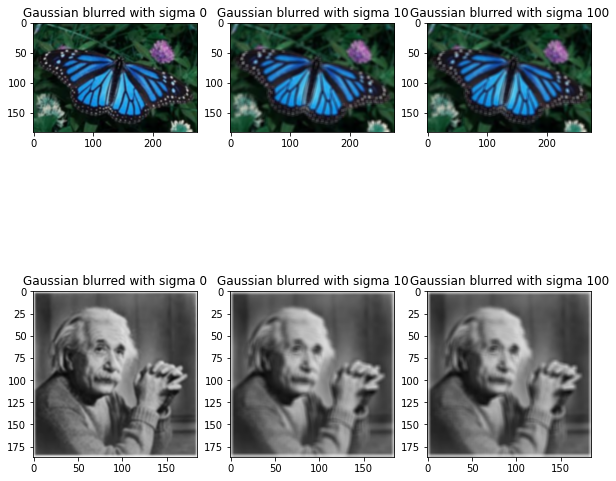

In [ ]:
figG, axG = plt.subplots(2, 3, figsize=(10, 10))
axGf = axG.ravel()

gb = images[0]

Gaussian_blurred_1 = cv2.GaussianBlur(gb,(5,5),0)
axGf[0].title.set_text('Gaussian blurred with sigma 0')
axGf[0].imshow(Gaussian_blurred_1)

Gaussian_blurred_2 = cv2.GaussianBlur(gb,(5,5),10)
axGf[1].title.set_text('Gaussian blurred with sigma 10')
axGf[1].imshow(Gaussian_blurred_2)

Gaussian_blurred_3 = cv2.GaussianBlur(gb,(5,5),100)
axGf[2].title.set_text('Gaussian blurred with sigma 100')
axGf[2].imshow(Gaussian_blurred_3)

gb1 = images[2]

Gaussian_blurred_4 = cv2.GaussianBlur(gb1,(5,5),0)
axGf[3].title.set_text('Gaussian blurred with sigma 0')
axGf[3].imshow(Gaussian_blurred_4)

Gaussian_blurred_5 = cv2.GaussianBlur(gb1,(5,5),10)
axGf[4].title.set_text('Gaussian blurred with sigma 10')
axGf[4].imshow(Gaussian_blurred_5)

Gaussian_blurred_6 = cv2.GaussianBlur(gb1,(5,5),100)
axGf[5].title.set_text('Gaussian blurred with sigma 100')
axGf[5].imshow(Gaussian_blurred_6)

# Question 2.5.1

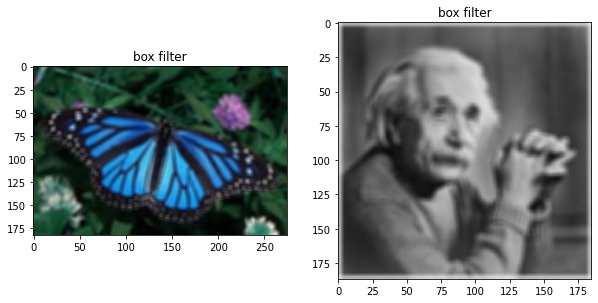

In [ ]:
figbf, axbf = plt.subplots(1, 2, figsize=(10, 10))
axbff = axbf.ravel()

boxf = images[0]

bf = cv2.boxFilter(boxf, 0, (5,5))
axbff[0].title.set_text('box filter')
axbff[0].imshow(bf)

boxf1 = images[2]

bf1 = cv2.boxFilter(boxf1, 0, (5,5))
axbff[1].title.set_text('box filter')
axbff[1].imshow(bf1)

# Question 2.5.3.a

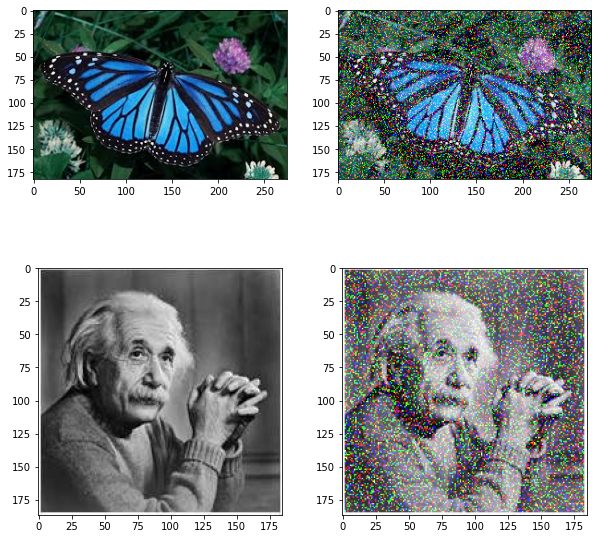

In [ ]:
figgn, axgn = plt.subplots(2, 2, figsize=(10, 10))
axgnn = axgn.ravel()

gn = images[0]

# Generate Gaussian noise
gauss = np.random.normal(0,1,gn.size)
gauss = gauss.reshape(gn.shape[0],gn.shape[1],gn.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(gn,gauss)
axgnn[0].imshow(gn, cmap=plt.cm.gray)
axgnn[1].imshow(img_gauss, cmap=plt.cm.gray)

gn1 = images[2]
# Generate Gaussian noise
gauss1 = np.random.normal(0,1,gn1.size)
gauss1 = gauss1.reshape(gn1.shape[0],gn1.shape[1],gn1.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss1 = cv2.add(gn1,gauss1)
axgnn[2].imshow(gn1, cmap=plt.cm.gray)
axgnn[3].imshow(img_gauss1, cmap=plt.cm.gray)

# Question 2.5.3.b

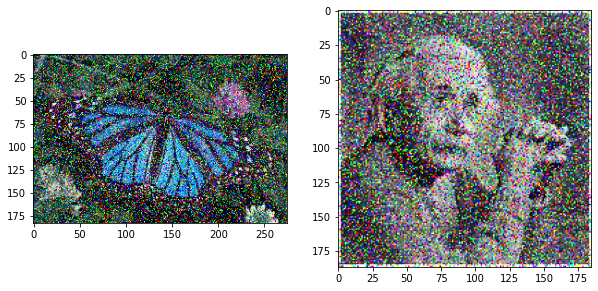

In [ ]:
from skimage.util import random_noise
 
figsp, axsp = plt.subplots(1, 2, figsize=(10, 10))
axsnp = axsp.ravel()

# Load the image
snp = images[0]
 
# Add salt-and-pepper noise to the image.
noise_snp = random_noise(snp, mode='s&p',amount=0.3)
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_snp = np.array(255*noise_snp, dtype = 'uint8')
axsnp[0].imshow(noise_snp)

# Load the image
snp1 = images[2]
 
# Add salt-and-pepper noise to the image.
noise_snp1 = random_noise(snp1, mode='s&p',amount=0.3)
 
# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_snp1 = np.array(255*noise_snp1, dtype = 'uint8')
axsnp[1].imshow(noise_snp1)

# Question 2.5.4

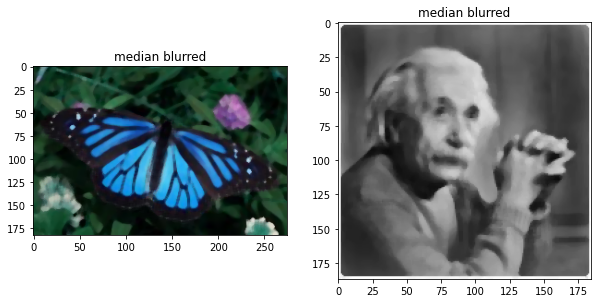

In [ ]:
figmf, axm = plt.subplots(1, 2, figsize=(10, 10))
axmf = axm.ravel()

mf = images[0]

imgmf = cv2.medianBlur(mf, 5)
axmf[0].title.set_text('median blurred')
axmf[0].imshow(imgmf)

mf1 = images[2]

imgmf1 = cv2.medianBlur(mf1, 5)
axmf[1].title.set_text('median blurred')
axmf[1].imshow(imgmf1)


# Question 2.6.1

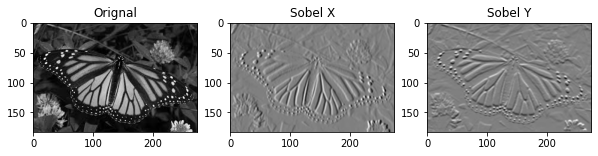

In [ ]:
sobelimg = images[0]
sobelimggs = cv2.cvtColor(sobelimg, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(sobelimggs,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(sobelimggs,cv2.CV_64F,0,1,ksize=5)

figsob, axso = plt.subplots(1, 3, figsize=(10, 10))
axsob = axso.ravel()
axsob[0].title.set_text('Orignal')
axsob[0].imshow(sobelimggs, cmap=plt.cm.gray)
axsob[1].title.set_text('Sobel X')
axsob[1].imshow(sobelx, cmap=plt.cm.gray)
axsob[2].title.set_text('Sobel Y')
axsob[2].imshow(sobely, cmap=plt.cm.gray)

# Question 2.6.2

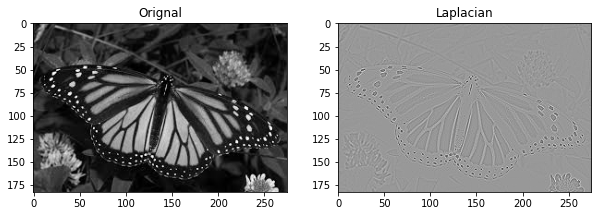

In [ ]:
lapimg = images[0]
lapimggs = cv2.cvtColor(lapimg, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(lapimggs,cv2.CV_64F)

figlap, axl = plt.subplots(1, 2, figsize=(10, 10))
axlap = axl.ravel()
axlap[0].title.set_text('Orignal')
axlap[0].imshow(lapimggs, cmap=plt.cm.gray)
axlap[1].title.set_text('Laplacian')
axlap[1].imshow(laplacian, cmap=plt.cm.gray)

# Question 2.6.3

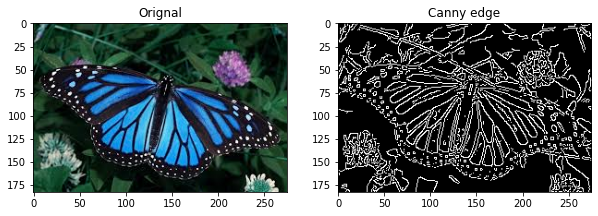

In [ ]:
cannyimg = images[0]
edges = cv2.Canny(cannyimg,100,200)
figcan, axca = plt.subplots(1, 2, figsize=(10, 10))
axcan = axca.ravel()
axcan[0].title.set_text('Orignal')
axcan[0].imshow(cannyimg)
axcan[1].title.set_text('Canny edge')
axcan[1].imshow(edges, cmap=plt.cm.gray)